In [46]:
import sys
sys.path.append('../')

import os

import cqt
import cqt.env.mkt_env as env 
import cqt.env.mkt_env_spot as envspot
import cqt.ledger.ledger as ledger
import cqt.datagen as dg
import cqt.dbutility.dbutility as db
import cqt.strats.strategy as stg
import cqt.strats.strategy_long_short_average as stg_ls
import pandas as pd
import pickle

from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import copy

In [47]:
data = pd.read_csv('../data/webdata/Gemini_BTCUSD_d.csv',skiprows=1)
data.rename(columns={'Open': 'price_open', 'High': 'price_high', 'Low': 'price_low', 'Close': 'price_close', 'Volume BTC':'volume_traded','Date':'time_close'},inplace=True)
df_btc=dg.IndexedData("","",data)



In [5]:
config = {'asset_type': 'spot'}
model_btc = env.MktEnv([])
comp_btc = envspot.MktEnvSpot('btc', df_btc, config)
comp_btc.data=comp_btc.data.sort_index()
model_btc_eth.insert_section(comp_btc)

cash = 10000
assets = {'btc': 0}
ini_pfo = ledger.Ledger(assets, cash)

ls_rule = {'method' : 'moving_average', 'window_size' : [15, 30], 'tolerance_up' : 0.03, 'tolerance_down' : 0.03}
strats = stg_ls.StrategyInverseMA(model_btc, ini_pfo, ls_rule)
start_date_str = '2018-01-01'
end_date_str='2019-11-01'
start_date = datetime.strptime(start_date_str, '%Y-%m-%d')
end_date=datetime.strptime(end_date_str, '%Y-%m-%d')
report = strats.back_testing(start_date ,end_date)

longShortReport = report.copy()

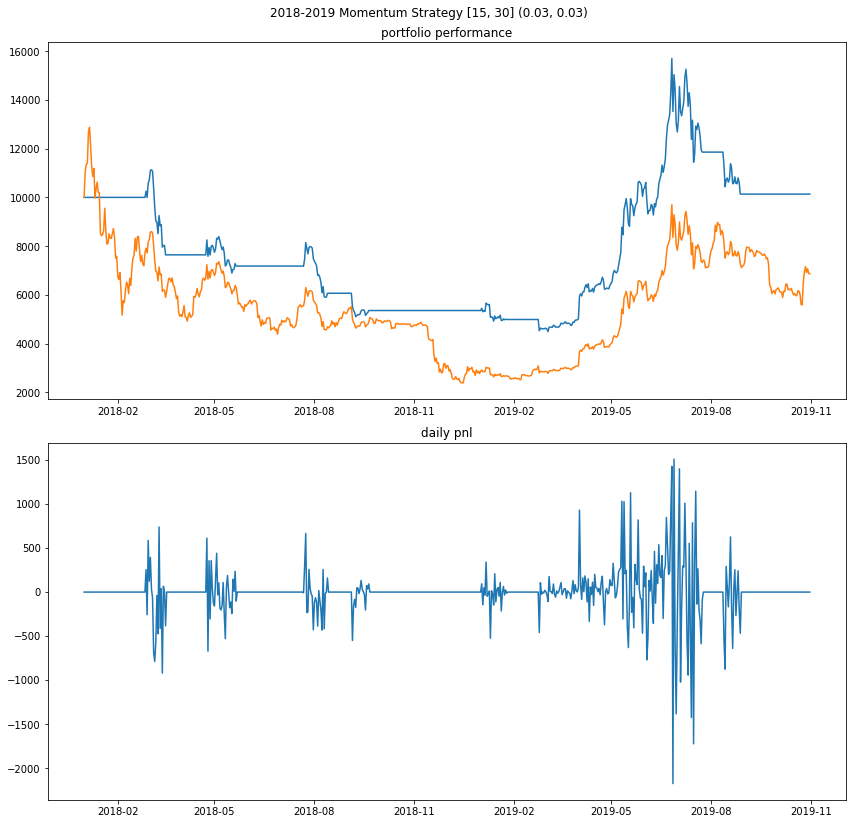

max daily gain: 1510.4160184877455
max daily loss: -2175.7636805971615


In [48]:
report = longShortReport
outDir='./'

strategyName = '2018-2019 Momentum Strategy [15, 30] (0.03, 0.03)'
report.to_csv(os.path.join(outDir, strategyName+'.csv'), index=False)
fig_width = 12
fig_height = 12
fig, ax0 = plt.subplots(2,1, figsize=(fig_width,fig_height))
ax0[0].plot(report['date'], report['total'])
ax0[0].plot(report['date'], report['btc_price'] * cash / report['btc_price'][0])
ax0[0].set_title('portfolio performance')
ax0[1].plot(report['date'], report['pnl'])
ax0[1].set_title('daily pnl')
fig.suptitle(strategyName)
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
fig.savefig(os.path.join(outDir, strategyName+'.pdf'))
plt.show()

print('max daily gain:', report['pnl'].max())
print('max daily loss:', report['pnl'].min())
